In [1]:
import numpy as np
import scipy.spatial.distance as dist
import scipy. cluster.hierarchy as clust
import matplotlib.pyplot as plt
import matplotlib.colors as c

In [2]:
data = np.loadtxt('E_Lz_LT_circ.csv', delimiter = ',') 
# data:
# 1st row : all E's
# 2st row : all Lz's
# 3st row : all LT's
# 4st row : all circ's

In [3]:
%%time
#rescaling values except circularity

# rescaling function : ScaledData=m*Data+b
# computing slopes and intercepts
maxvals = np.amax(data, axis=1)
minvals = np.amin(data, axis=1)
slopes = 2 / (maxvals - minvals)
intercepts = -1 - 2* minvals/ (maxvals-minvals)
# To not shift circularity I set b=0 for the last row
#slopes[3]= 1
intercepts[3]=0
# manually broadcasting slopes and intercepts
m_2d = np.repeat(slopes.T, data.shape[1]).reshape(data.shape[0],data.shape[1])
b_2d = np.repeat(intercepts.T, data.shape[1]).reshape(data.shape[0],data.shape[1])
# computing rescaled data
datascaled = m_2d * data + b_2d

CPU times: user 338 µs, sys: 4.2 ms, total: 4.54 ms
Wall time: 11.8 ms


In [4]:
%%time
data = datascaled

DistMatrix = dist.pdist(data.T) # computing the distance array
meandist = np.average(DistMatrix)

DistanceTreshold = 0.01

LinkageMatrix = clust.single(DistMatrix) # computing the linkage matrix
clustID = clust.fcluster(LinkageMatrix, DistanceTreshold, criterion='distance')


CPU times: user 48.6 s, sys: 1min 35s, total: 2min 24s
Wall time: 2min 26s


number of clusters: 23706
CPU times: user 103 ms, sys: 15.6 ms, total: 119 ms
Wall time: 139 ms


Text(0, 0.5, 'number of clusters')

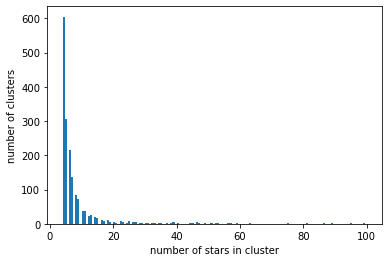

In [5]:
%%time
print('number of clusters:',np.amax(clustID))
stars_per_clusterID = np.bincount(clustID)
_ = plt.hist(stars_per_clusterID, bins = 'auto', range=(4,100))
plt.xlabel('number of stars in cluster')
plt.ylabel('number of clusters');

In [33]:
biggestcluster_numstars = np.amax(stars_per_clusterID)
cond1 = stars_per_clusterID >= 30
cond2 = stars_per_clusterID < biggestcluster_numstars 
clusters_of_interrest = np.where(cond1 & cond2)[0]
numClusters = clusters_of_interrest.shape[0]
print(numClusters)
print(biggestcluster_numstars)


45
7295


In [34]:
clustList = []
for i in np.arange(numClusters):
    stars_clust  = np.where(clustID == clusters_of_interrest[i])[0]
    clustList.append( data[:, stars_clust] )

In [35]:
def plotcluster(cluster, fmt):
    ax[0][0].scatter(cluster[1,:], cluster[0,:],color=fmt, marker=',')
    ax[0][1].scatter(cluster[1,:], cluster[2,:],color=fmt, marker=',')
    ax[0][2].scatter(cluster[3,:], cluster[1,:],color=fmt, marker=',')
    ax[1][0].scatter(cluster[2,:], cluster[0,:],color=fmt, marker=',')
    ax[1][1].scatter(cluster[3,:], cluster[2,:],color=fmt, marker=',')
    ax[1][2].scatter(cluster[3,:], cluster[0,:],color=fmt, marker=',')
    return

In [36]:
deg = np.linspace(0,360,numClusters)
hsv = 0.95*np.ones(numClusters*3).reshape(numClusters,3)
hsv[:,0] = deg/360
c1 = c.hsv_to_rgb(hsv)

In [37]:
plt.rcParams.update({'font.size':50})

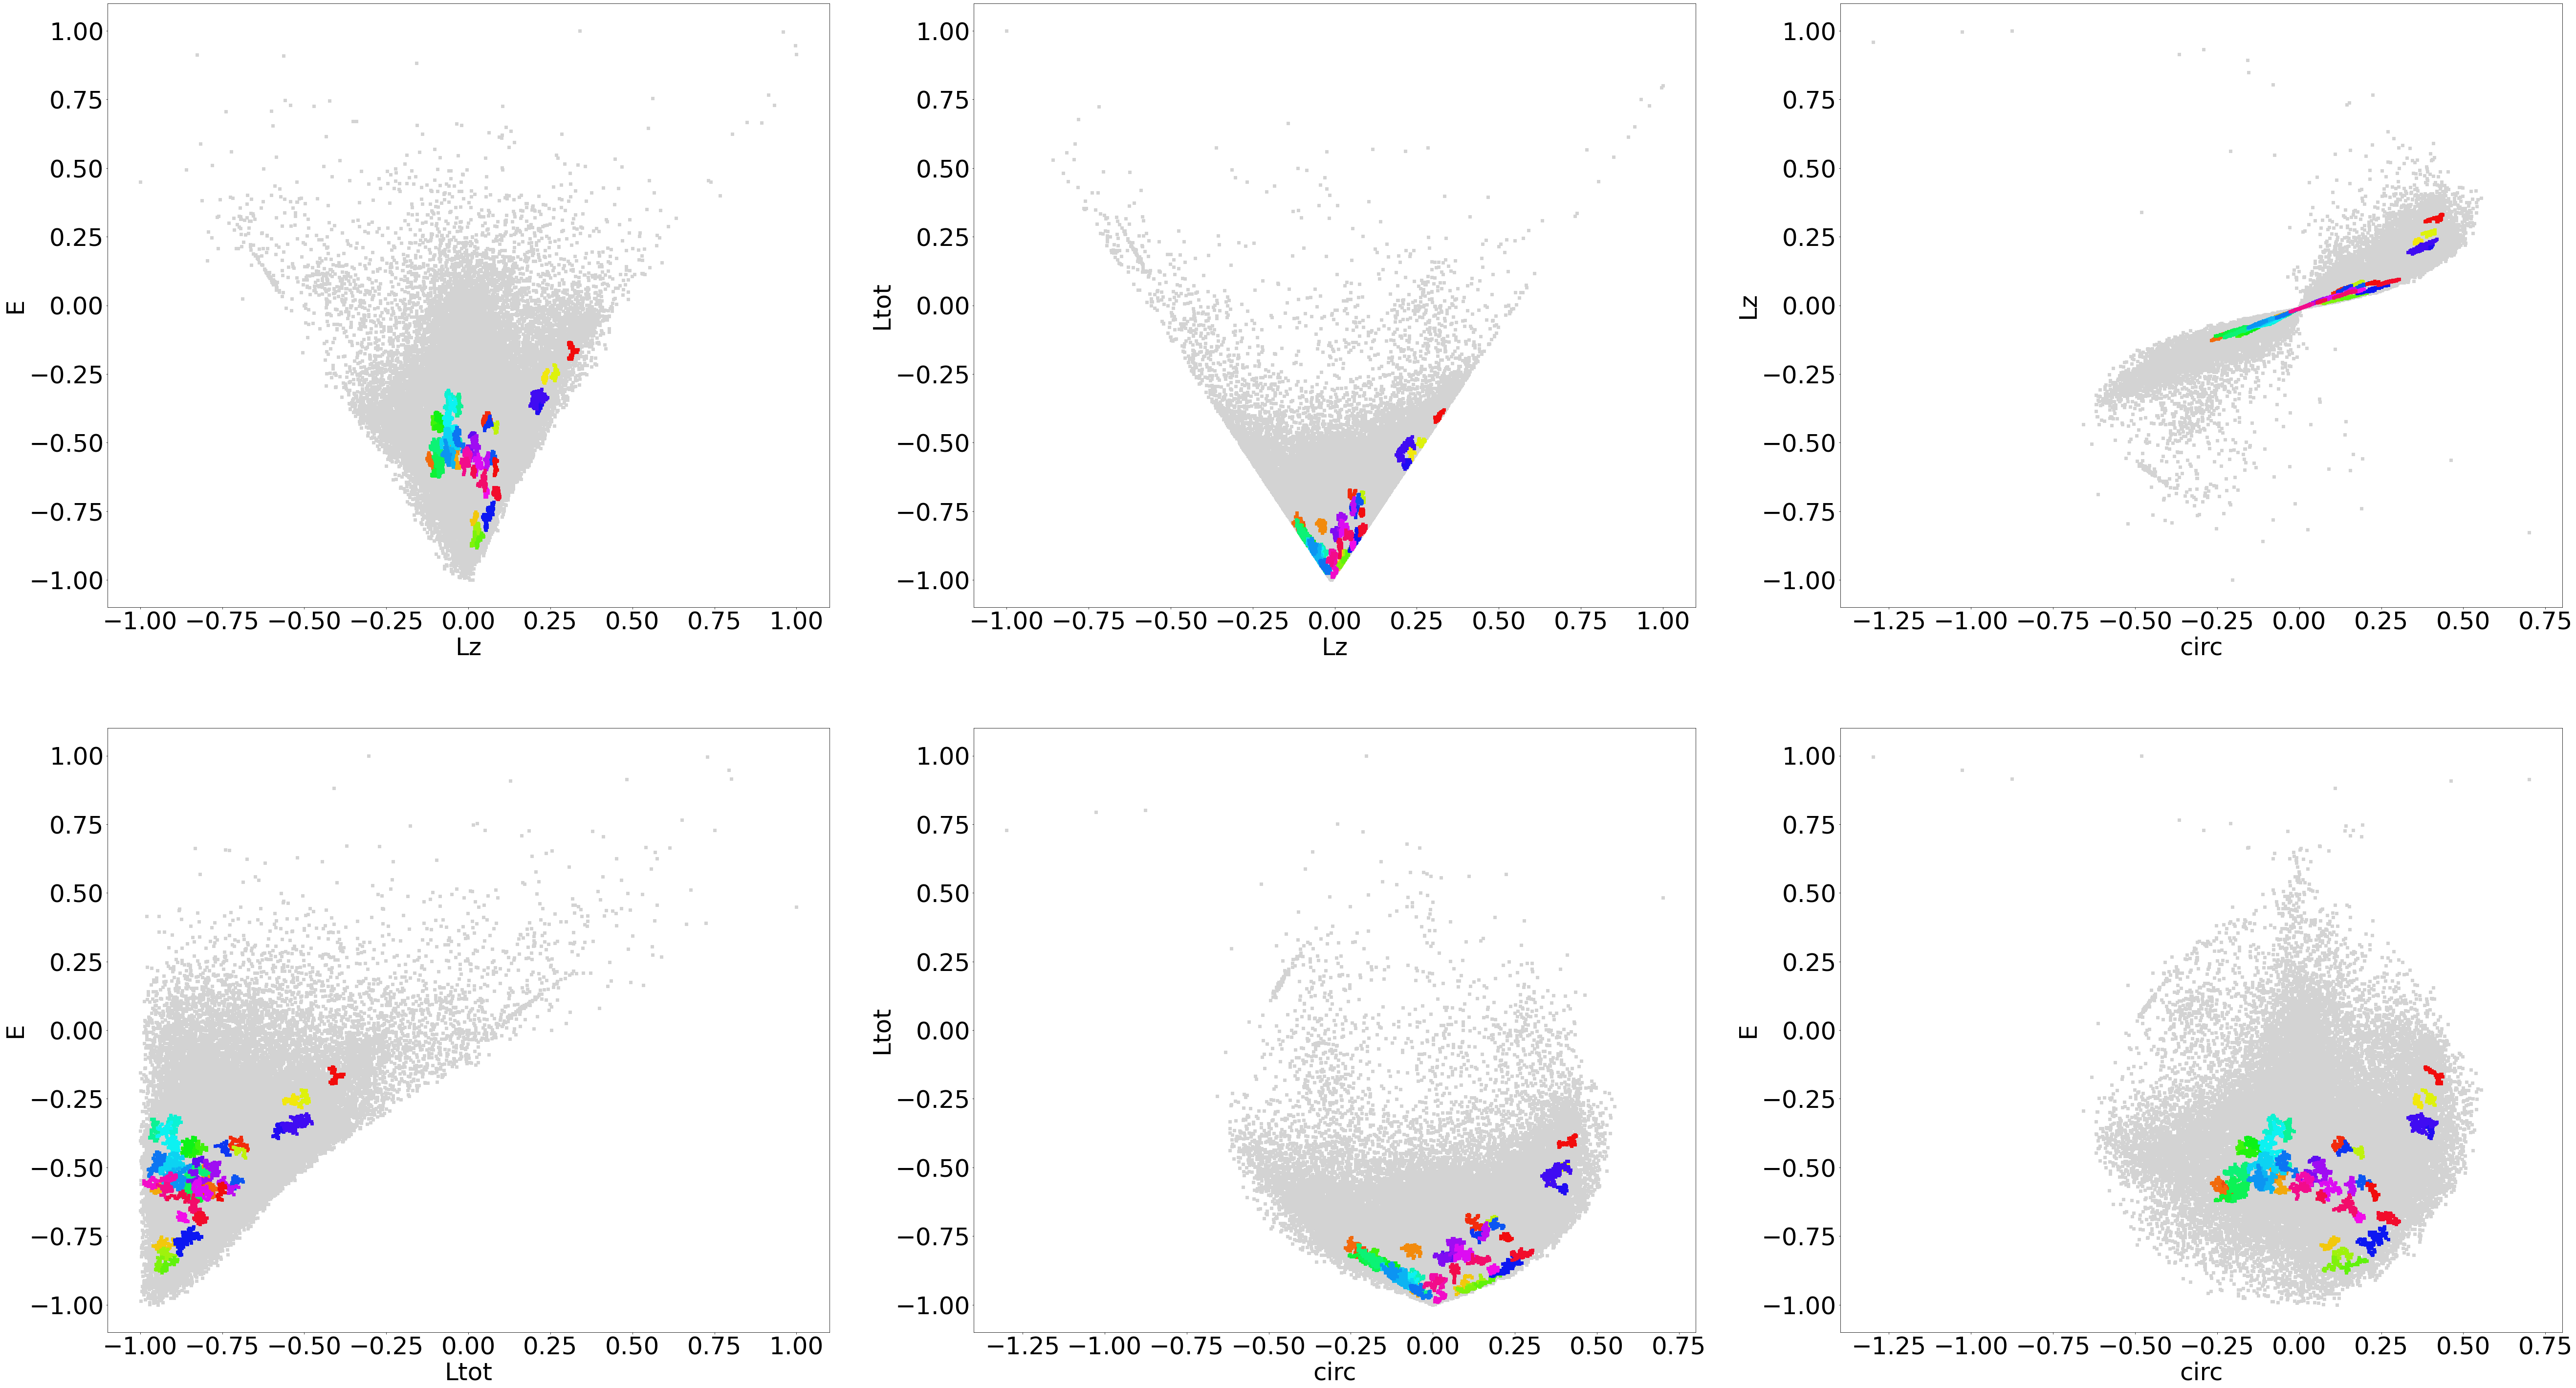

In [38]:
fig, ax = plt.subplots(2, 3, figsize=(18*5,10*5)) 
plotcluster(data, 'lightgrey')

for i in np.arange(numClusters):
    plotcluster(clustList[i], c.rgb2hex(c1[i]))

ax[0][0].set_xlabel('Lz')
ax[0][1].set_xlabel('Lz')
ax[0][2].set_xlabel('circ')
ax[1][0].set_xlabel('Ltot')
ax[1][1].set_xlabel('circ')
ax[1][2].set_xlabel('circ')

ax[0][0].set_ylabel('E')
ax[0][1].set_ylabel('Ltot')
ax[0][2].set_ylabel('Lz')
ax[1][0].set_ylabel('E')
ax[1][1].set_ylabel('Ltot')
ax[1][2].set_ylabel('E');

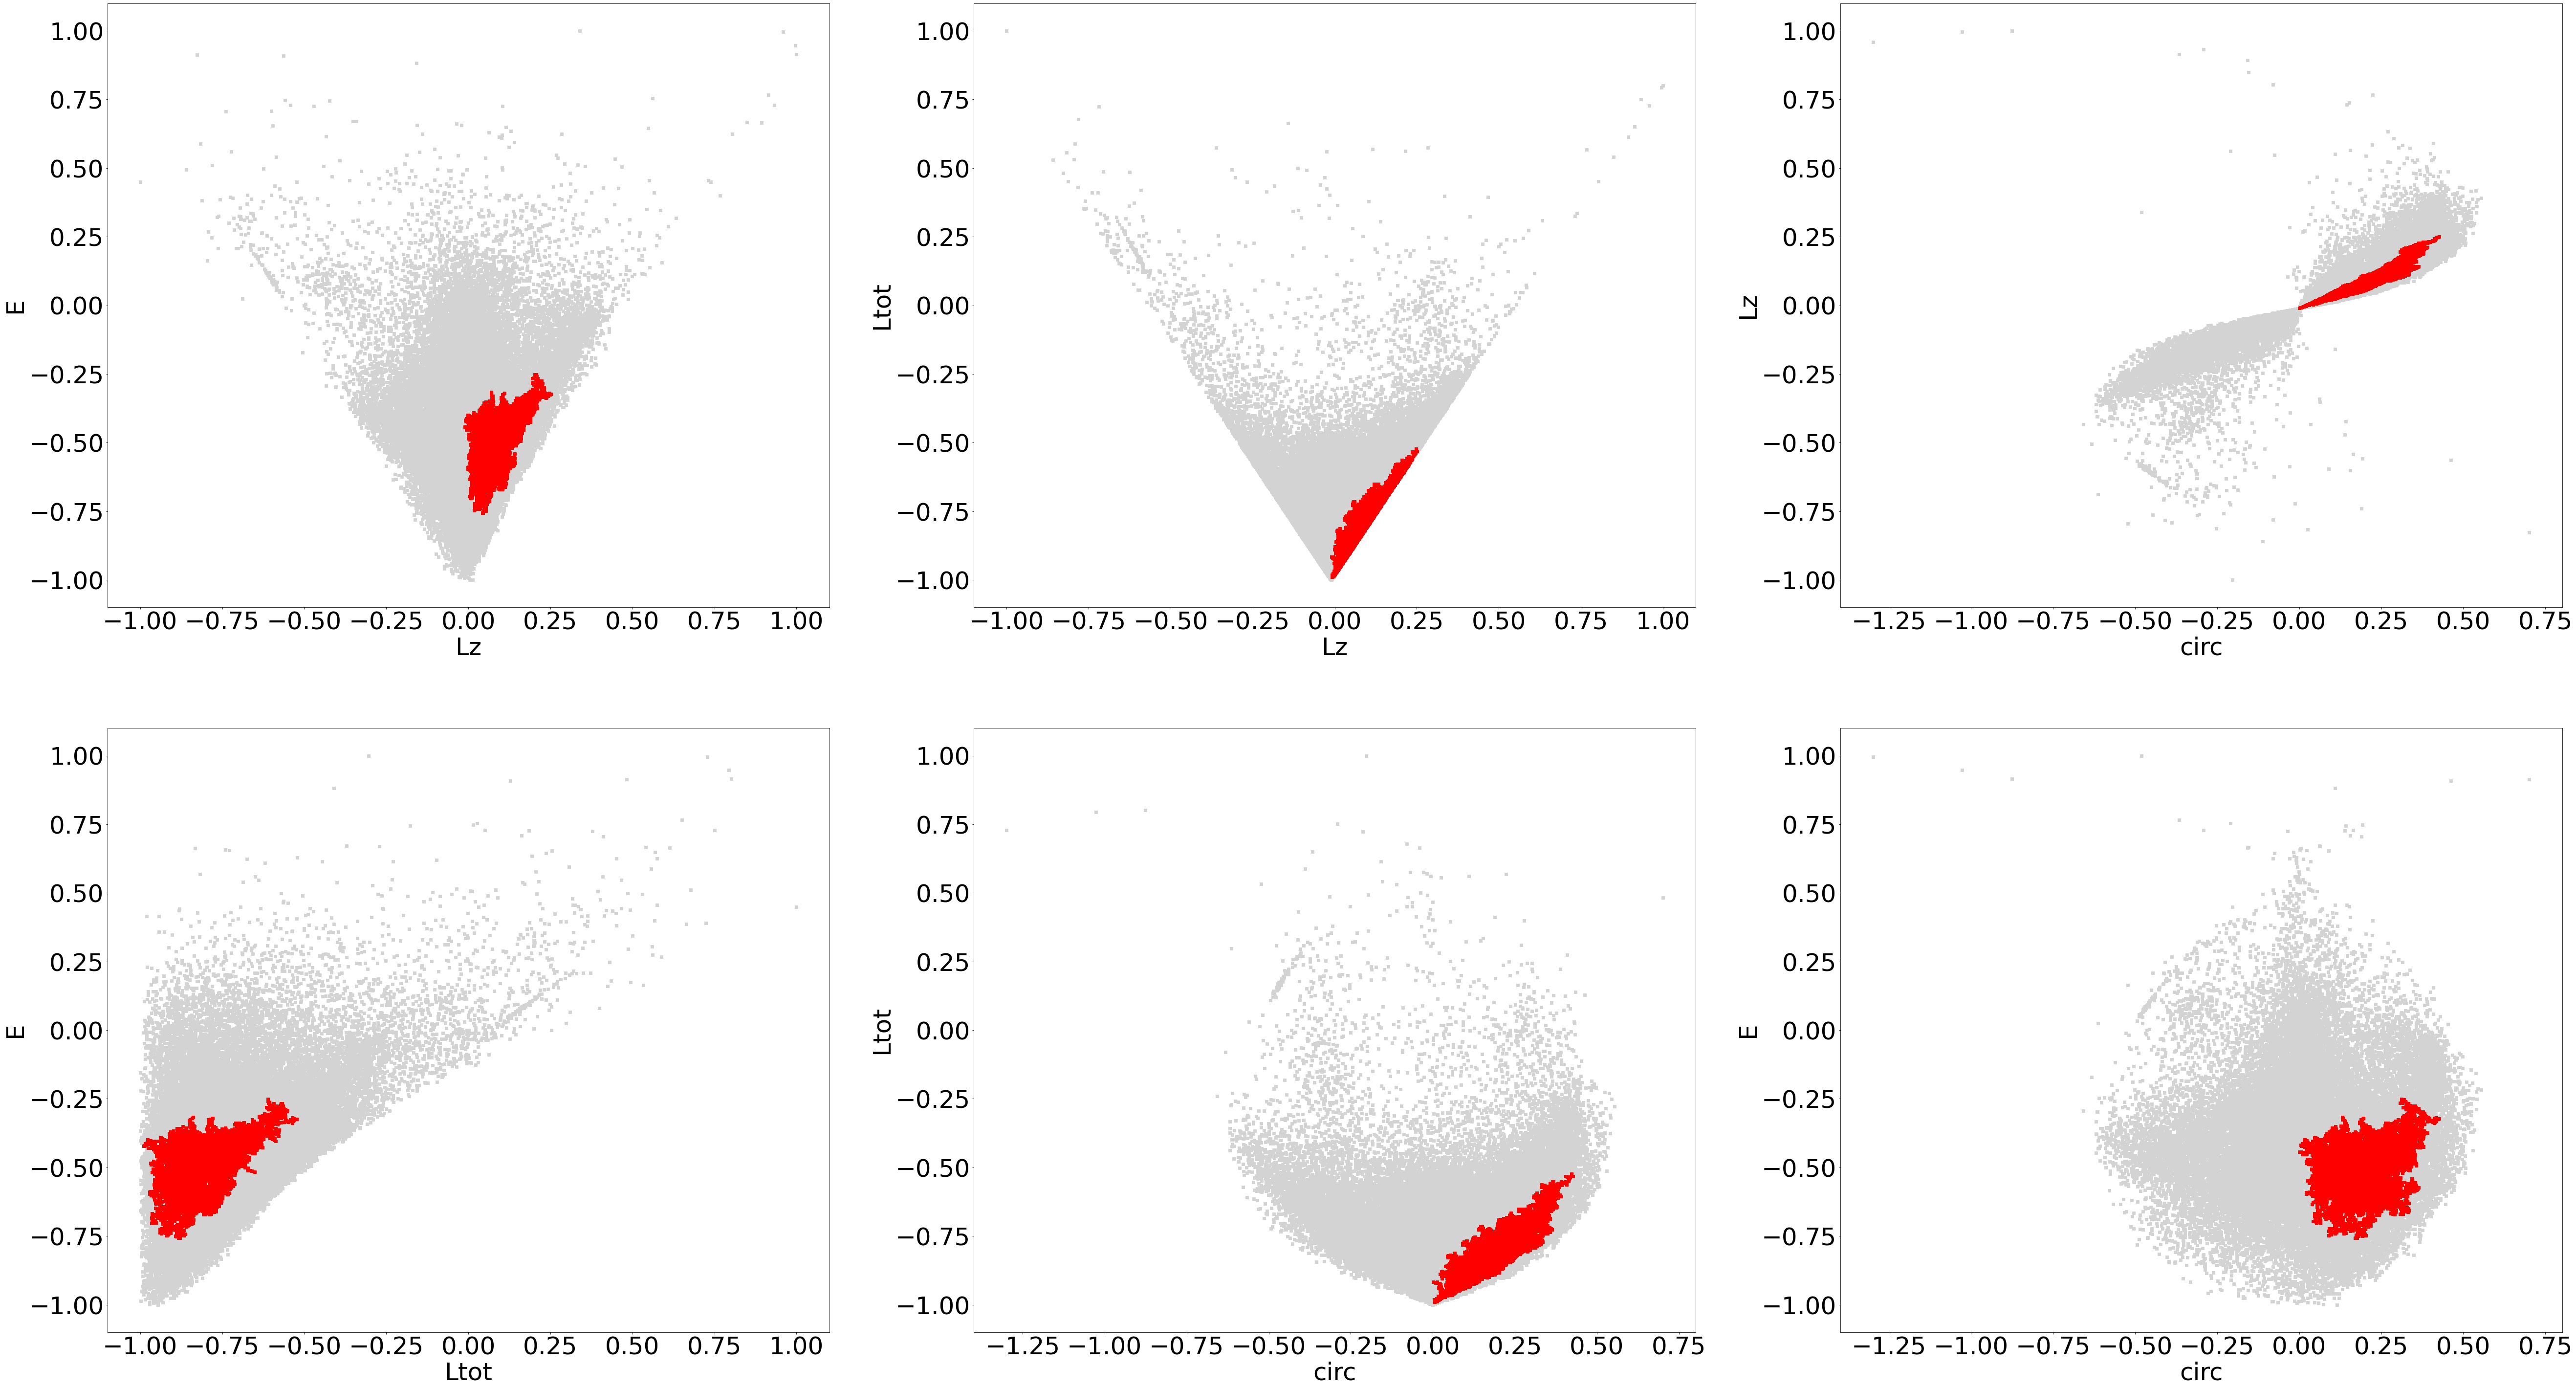

In [26]:
BigClust = np.where(stars_per_clusterID == biggestcluster_numstars )[0]
stars_Bigclust  = np.where(clustID == BigClust)[0]

fig, ax = plt.subplots(2, 3, figsize=(18*5,10*5)) 
plotcluster(data, 'lightgrey')
plotcluster(data[:, stars_Bigclust], 'r')

ax[0][0].set_xlabel('Lz')
ax[0][1].set_xlabel('Lz')
ax[0][2].set_xlabel('circ')
ax[1][0].set_xlabel('Ltot')
ax[1][1].set_xlabel('circ')
ax[1][2].set_xlabel('circ')

ax[0][0].set_ylabel('E')
ax[0][1].set_ylabel('Ltot')
ax[0][2].set_ylabel('Lz')
ax[1][0].set_ylabel('E')
ax[1][1].set_ylabel('Ltot')
ax[1][2].set_ylabel('E');

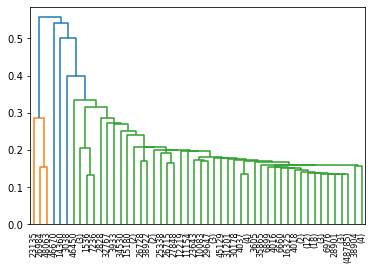

In [11]:
R = clust.dendrogram(LinkageMatrix,p=50 , truncate_mode = 'lastp')

In [12]:
LinkageMatrix

array([[2.08000000e+02, 3.98360000e+04, 1.28516871e-04, 2.00000000e+00],
       [2.13880000e+04, 2.70900000e+04, 1.30970384e-04, 2.00000000e+00],
       [1.80920000e+04, 4.43790000e+04, 1.41927426e-04, 2.00000000e+00],
       ...,
       [1.43600000e+04, 9.77530000e+04, 5.02342136e-01, 4.88750000e+04],
       [4.66700000e+04, 9.77540000e+04, 5.41669579e-01, 4.88760000e+04],
       [9.77500000e+04, 9.77550000e+04, 5.57909836e-01, 4.88790000e+04]])

In [14]:
clust.fcluster(LinkageMatrix, 2, criterion= 'maxclust')

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [16]:
data.shape

(4, 48879)

In [ ]:
# next steps: statistical significance